# Visualiser les données

## 0. Chargement des données & recodage

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import pyshs
import matplotlib.pyplot as plt
import pyreadstat

def question(v,meta):
    return meta.column_names_to_labels[v]

def modalites(v,meta):
    return meta.value_labels[meta.variable_to_label[v]]

df, meta = pyreadstat.read_sav('./wgm-full-wave2-public-file.sav')

data = df[df["COUNTRYNEW"]=="Switzerland"]

data["poids"] = data["WGT"]

data["pays"] = data["COUNTRYNEW"]
data["age"] = data["Age"].fillna("NA")
data["age_reco"] = pd.cut(data['Age'],[0,35,45,55,65,100],
                labels = ["1-[15-35[","2-[35-45[","3-[45-55[","4-[55-65[","5-[65-75]"])
data["genre"] = data["Gender"].replace({1.0: '1-Male', 2.0: '2-Female'})
data["education"] = data["Education"].replace(modalites('Education',meta))
data["revenus"] = data["Household_Income"].replace({1.0: 'Q1', 2.0: 'Q2',3:"Q3",4:"Q4",5:"Q5"})
data["region"] = data["Global11Regions"].replace(modalites("Global11Regions",meta))
data["revenus_avis"] = data["Subjective_Income"].replace(modalites("Subjective_Income",meta))

reco = {1:"1-A lot", 2:"2-Some", 3:"3-Not much/at all",4:"3-Not much/at all",99:"4-NA"}
data["connaissance_science"] = data['W1'].replace(reco)
data["comprendre_science"] = data['W2'].replace(reco)
data["education_science"] = data["W3"].replace(modalites('W3',meta))
data["confiance_hopital"] = data["W4"].replace(reco)
data["confiance_science"] = data["W6"].replace(reco)
data["confiance_gouvernement"] = data["W5B"].replace(reco)
data["confiance_scientifiques"] = data["W5C"].replace(reco)
data["confiance_journalistes"] = data["W5D"].replace(reco)
data["confiance_medecins"] = data["W5E"].replace(reco)
data["confiance_rebouteux"] = data["W5G"].replace(reco)
data["recherche_cancer"] = data['MH4A'].replace(modalites("MH4A",meta)).fillna("NA")

reco = {1:"1-A lot", 2:"2-Some", 3:"3-Not much/at all",4:"3-DK",8:"3-DK",9:"3-DK"}
data["covid_impact"] = data["WP21757"].replace(reco)


data["gouvernants_valorisent_scientifiques"] = data["W7C"].replace(reco)

data["socialmedia_month"] = data["W27"].replace(modalites("W27",meta))
reco = {1.0: '1-Almost every hour',2.0: '1-Almost every hour',3.0: '2-At least once a day',
 4.0: '2-At least once a day', 5.0: '3-A few days a week', 6.0: '4-Less frequently', 99.0: '5-DK/Refused'}
data["socialmedia_freq"] = data["W28"].replace(reco)
reco = {1:"1-Très souvent ou tout le temps",2:"1-Très souvent ou tout le temps",3:"2-Parfois",4:"3-Jamais",99:"NA"}
data["socialmedia_healthinfo"] = data["W29"].replace(reco)

data["science_religion"] = data["W30"].replace(modalites("W30",meta))
data["vaccin"] = data["WP21768"].replace(modalites("WP21768",meta))

data["scientists_benefits_people"] = data["W8"].replace({1:"1-Yes",2:"2-Some",3:"3-No",99:"4-NA"})
data["scientists_benefits_you"] = data["W9"].replace({1:"1-Yes",2:"2-Some",3:"3-No",99:"4-NA"})

Une partie importante du travail se fait en amont sur la préparation des données

## 1. visualisations

### 1.1 Logique générale de Matplotlib

Une philosophie de la visualisation : expliquer les différents niveaux qui composent une figure

![Structure d'une visualisation](matplotlib.png)


Quand on utilise Pandas, déclaration de la figure implicitement + beaucoup de paramètres fixés

<AxesSubplot:>

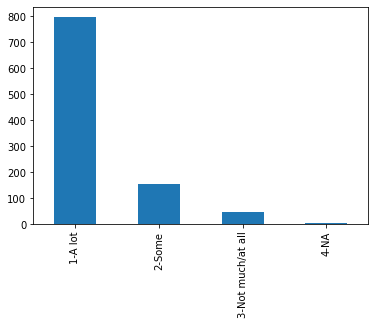

In [2]:
data["confiance_hopital"].value_counts().plot(kind="bar", )

### 1.2 Même visualisation avec Matplotlib

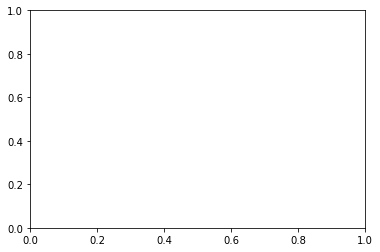

In [15]:
fig, ax = plt.subplots()

<BarContainer object of 3 artists>

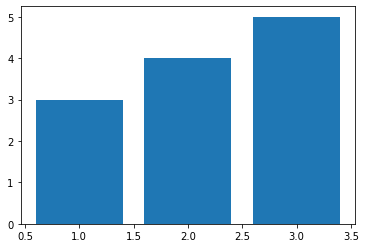

In [16]:
fig, ax = plt.subplots()
ax.bar([1,2,3],[3,4,5])

Ajouter un titre et sauvegarder la figure

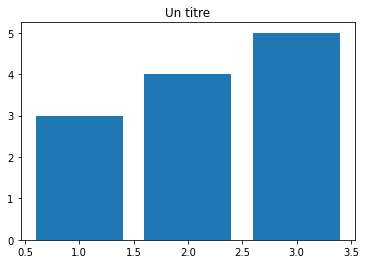

In [17]:
fig,ax = plt.subplots()
ax.bar([1,2,3],[3,4,5])
ax.set_title("Un titre")
fig.savefig("fig.png")

D'autres figures possibles : plot, hist, etc. Pour se repérer et voir tout ce qu'il est possible de faire :https://matplotlib.org/stable/gallery/index.html

Tout l'enjeu est maintenant d'améliorer...

- modifier les paramètres
- ajouter des noms d'axes
- changer la taille
- changer la couleur
- faire des figures plus complexes

Modifier la figure généré par Pandas

Text(0.5, 1.0, 'Nouveau titre')

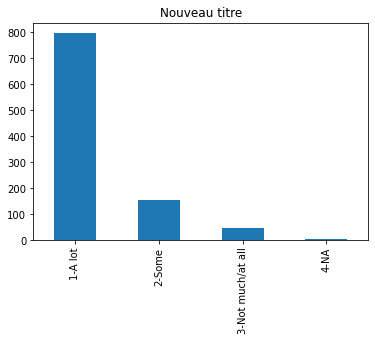

In [18]:
ax = data["confiance_hopital"].value_counts().plot(kind="bar")
ax.set_title("Nouveau titre")

### 1.3 Faire une figure un peu plus complexe

Expliquer la logique de construction de la figure

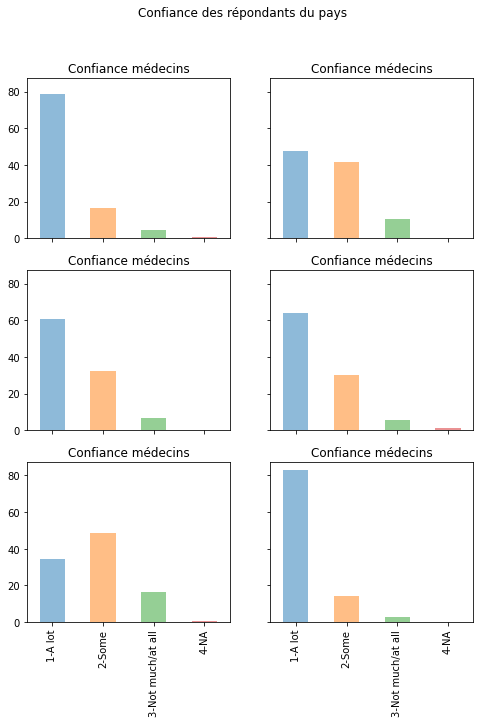

In [19]:
# Définir en amont les variables
variables = {"confiance_hopital":"Confiance hopital",
             "confiance_science":"Confiance Science",
            "confiance_gouvernement":"Confiance gouvernement",
            "confiance_scientifiques":"confiance scientifiques",
            "confiance_journalistes":"Confiance journalistes","confiance_medecins":"Confiance médecins"}

# Définir une nouvelle figure
fig,axes = plt.subplots(3,2,figsize=(8,10),
                      sharex=True,sharey=True)

# passer le tableau de 2 dimensions à 1
flat_axes = axes.flatten()
#colors = ["green", "orange", "red", "gray"]
colors = ["C0", "C1", "C2", "C3"]
# Pour chaque variable à tracer
for var,ax in zip(variables,flat_axes):
    t = pyshs.tri_a_plat(data, var ,"poids")["Pourcentage (%)"].drop("Total")
    t.plot(kind='bar', ax=ax, color=colors , alpha=0.5)
    ax.set_title(variables[i])
    
fig.suptitle("Confiance des répondants du pays")

fig.savefig("savefig.png", bbox_inches="tight")

Text(0.5, 1.0, 'Science')

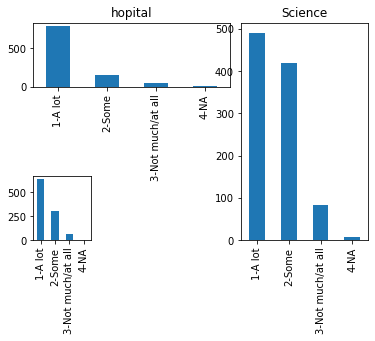

In [35]:
fig, axes = plt.subplot_mosaic(
'''\
HHHSS
...SS
G..SS''')

data["confiance_hopital"].value_counts().plot(kind="bar", ax=axes['H'])
data["confiance_science"].value_counts().plot(kind="bar", ax=axes['S'])
data["confiance_gouvernement"].value_counts().plot(kind="bar", ax=axes['G'])

axes['H'].set_title('hopital')
axes['S'].set_title('Science')